# Esercizio 2

### esercizio 2.1

Per l'importance sampling ho campionato i punti in due modi diversi: nel primo caso ho usato come pdf una retta e sono riuscito a usare il metodo della funzione inversa per campionare i punti secondo questa pdf, nel secondo caso ho usato un'arco di parabola ma ho usato il metodo Accept-reject.

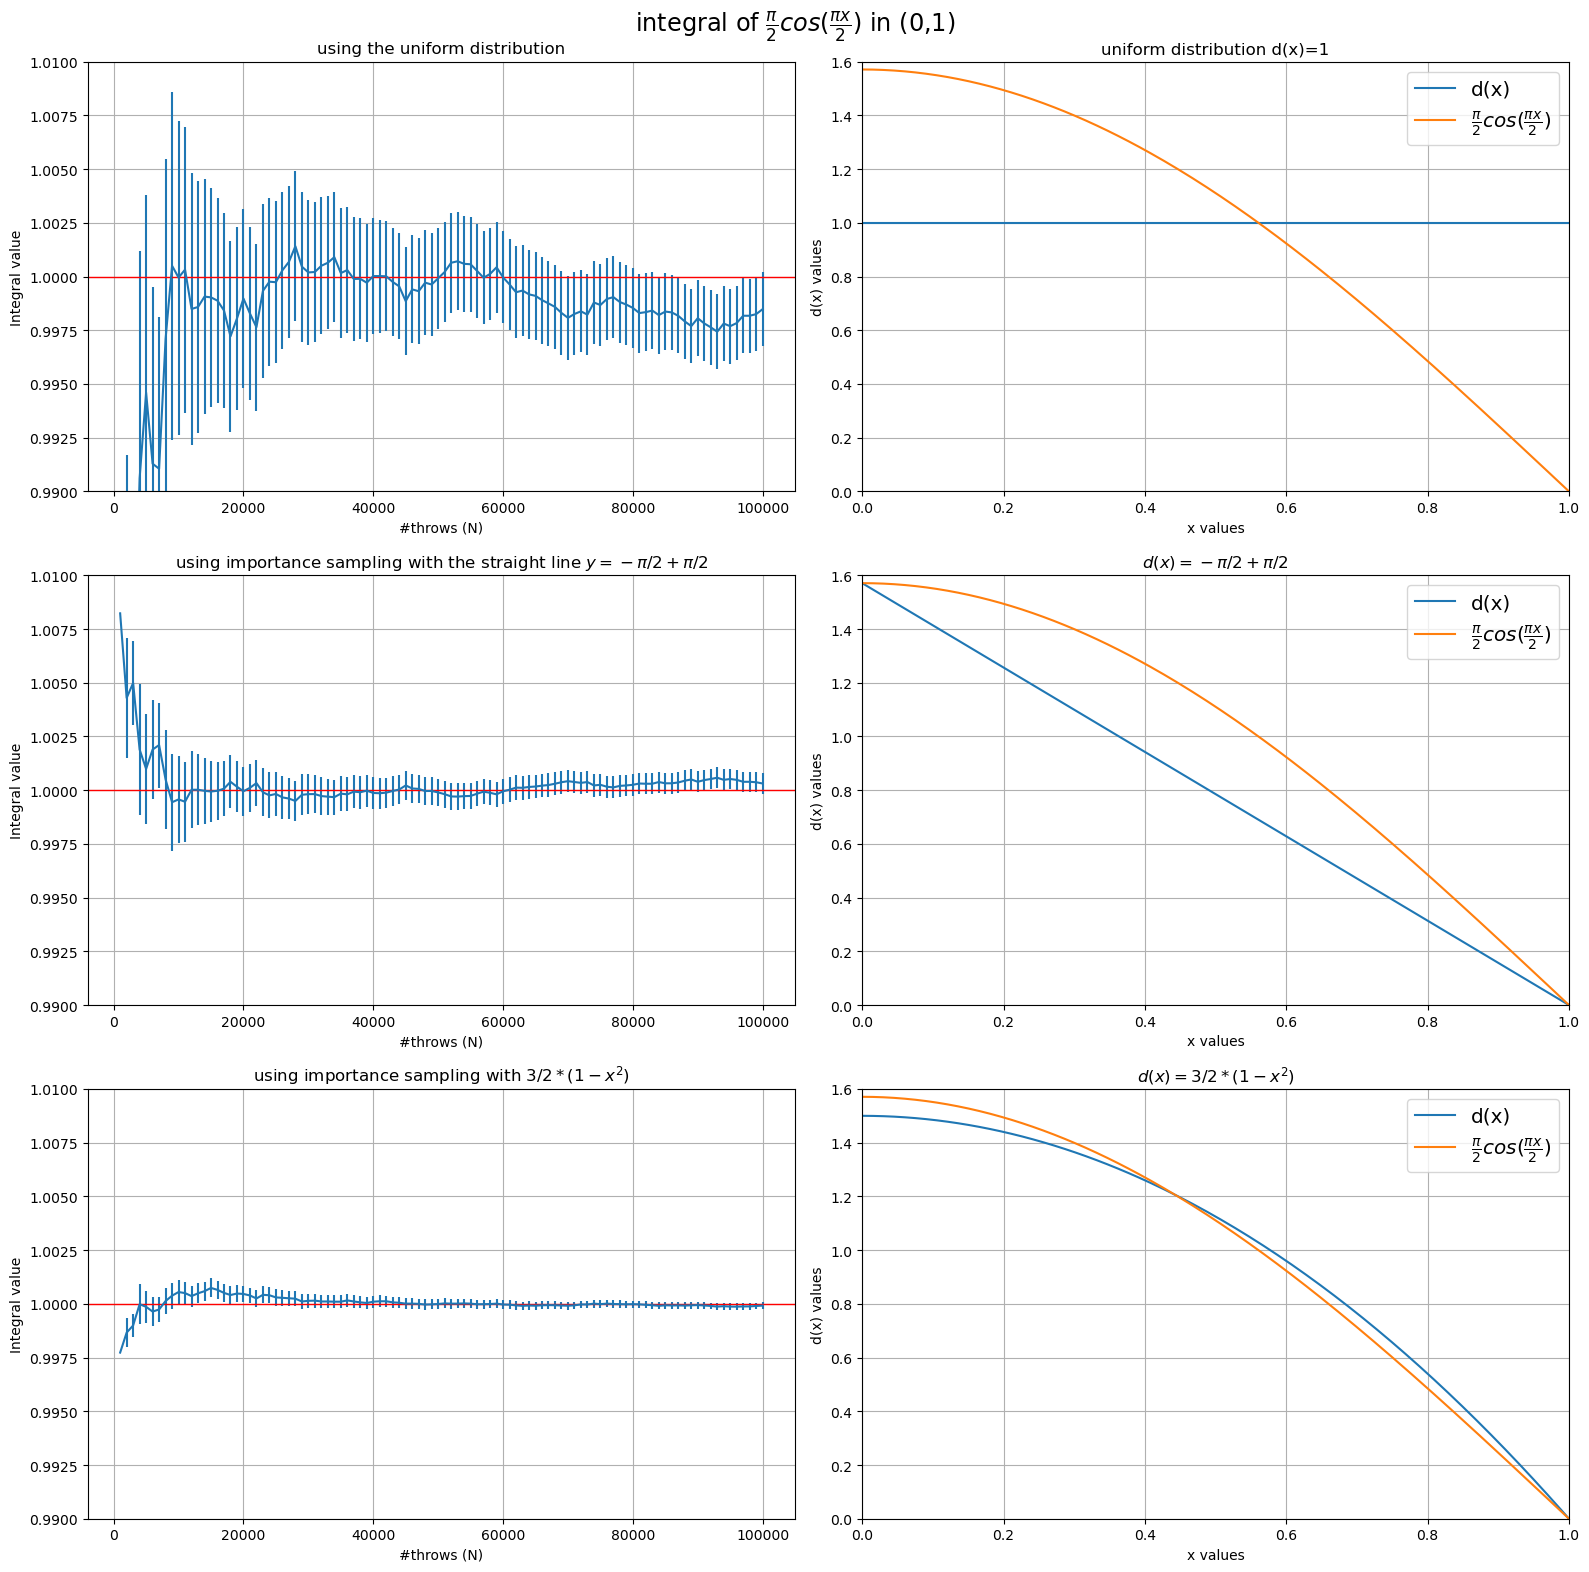

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math

parameters = np.loadtxt("./integral_parameters.txt")
I_unif = np.loadtxt("./integral_uniform.txt")
I_impo = np.loadtxt("./integral_importance_sampling.txt")
I_impo_AR = np.loadtxt("./integral_importance_sampling_AR.txt")

N = parameters[0] #numero di random totali
M = parameters[1] #numero di blocchi
L = N/M

x = np.arange(M+1)
x = x*L

#fig, axs = plt.subplots(3, 2, tight_layout = False, figsize=(8,16), sharey=True)
fig, axs = plt.subplots(3, 2, tight_layout = False, figsize=(16,16))

#grafici integrali
axs[0,0].errorbar(x[1:], I_unif[:,0], yerr = I_unif[:,1])
axs[0,0].grid(True)
axs[0,0].set_title("using the uniform distribution")

axs[1,0].errorbar(x[1:], I_impo[:,0], yerr = I_impo[:,1])
axs[1,0].grid(True)
axs[1,0].set_title(r"using importance sampling with the straight line $y = -\pi/2 + \pi/2$")

axs[2,0].errorbar(x[1:], I_impo_AR[:,0], yerr = I_impo_AR[:,1])
axs[2,0].grid(True)
axs[2,0].set_title(r"using importance sampling with $3/2*(1-x^2)$")

#grafici densità di probabilità
x_f = np.linspace(0, 1, 200)

y_cos = list( math.pi/2 * math.cos(math.pi*x/2) for x in x_f)
y_f1  = np.ones(200)
y_f2  = list( -math.pi*x /2 + math.pi/2 for x in x_f)
y_f3  = list( 3*( 1-x*x )/2 for x in x_f)

axs[0,1].plot(x_f, y_f1, label='d(x)')
axs[0,1].plot(x_f, y_cos, label=r"$\frac{\pi}{2}cos( \frac{\pi x}{2})$")
axs[0,1].grid(True)
axs[0,1].set_title("uniform distribution d(x)=1")

axs[1,1].plot(x_f, y_f2, label="d(x)")
axs[1,1].plot(x_f, y_cos, label=r"$\frac{\pi}{2}cos( \frac{\pi x}{2})$")
axs[1,1].grid(True)
axs[1,1].set_title(r"$d(x) = -\pi/2 + \pi/2$")

axs[2,1].plot(x_f, y_f3, label="d(x)")
axs[2,1].plot(x_f, y_cos, label=r"$\frac{\pi}{2}cos( \frac{\pi x}{2})$")
axs[2,1].grid(True)
axs[2,1].set_title(r"$d(x) = 3/2*(1-x^2)$")

for i in range(3):
    axs[i,0].set(xlabel='#throws (N)',ylabel='Integral value')
    axs[i,0].axhline(1, c='red', lw=1, ls='solid')
    axs[i,0].set(ylim=(0.99, 1.010))
    axs[i,1].set(xlabel='x values',ylabel='d(x) values')
    axs[i,1].set(xlim = (0,1), ylim=(0, 1.6))
    axs[i,1].legend(fontsize='x-large')
    
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)

plt.suptitle(r'integral of $\frac{\pi}{2}cos( \frac{\pi x}{2})$ in (0,1)', size='xx-large')
plt.show()


### esercizio 2.2

Per un random walk in 3 dimensioni si ha $ \sqrt{<r^2>} = L\sqrt{n} $ dove L è la lunghezza di un passo e n è il numero di passi per cui dato che in questo caso L=1 e n=100 si dovrebbe ottenere $ \sqrt{<r^2>} = 10 $ 

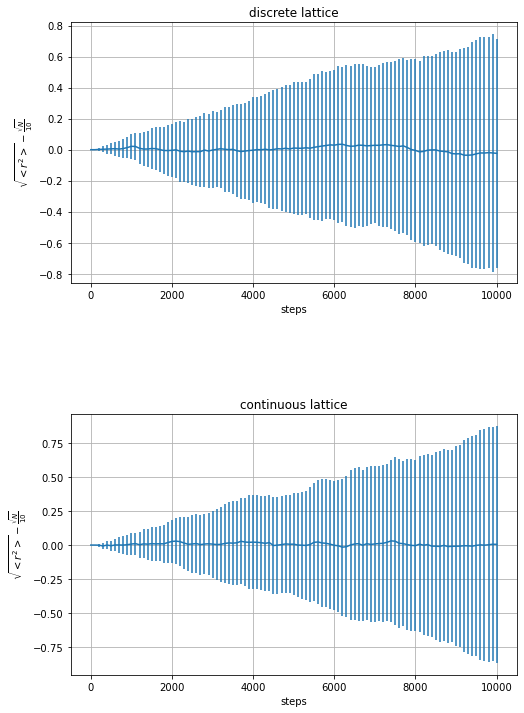

In [11]:
dis_walker = np.loadtxt("./discrete_random_walk.txt")
con_walker = np.loadtxt("./continuous_random_walk.txt")

N = 10000
M = 100 #numero di passi
L = 100
N_step = 100

x = list(range(0, N+L, L)) #x ha dimensione M+1 perchè il random walk parte da 0 e poi fa M passi
y = list(math.sqrt(n)/10 for n in x)

fig, axs = plt.subplots(2, 1, tight_layout = False, figsize=(8,12))

axs[0].errorbar(x, dis_walker[:,0] - y, yerr = dis_walker[:,1], label="rm simulation")
axs[1].errorbar(x, con_walker[:,0] - y, yerr = con_walker[:,1], label="rm simulation")

axs[0].grid(True)
axs[0].set_title("discrete lattice")
#axs[0].plot(x, y, label=r'$\sqrt({N}$')

axs[1].grid(True)
axs[1].set_title("continuous lattice")
#axs[1].plot(x, y, label=r'$\sqrt{N}$')

for i in range(2):
    axs[i].set(xlabel='steps',ylabel=r'$\sqrt{<r^2>} - \frac{\sqrt{N}}{10}$')
    #axs[i].set(xlim=(0, N+L), ylim=(0, 12))
    #axs[i].legend(fontsize='x-large')
    
#plt.suptitle(r'integral of $\frac{\pi}{2}cos( \frac{\pi x}{2})$ in (0,1)', size='xx-large')

fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)

plt.show()